In [13]:
# Guide via https://www.youtube.com/watch?v=N9NqTp_D_bw

# sudo apt-get -y install gcc build-essential
# wget https://github.com/ta-lib/ta-lib/releases/download/v0.6.4/ta-lib-0.6.4-src.tar.gz \
# tar -xzf ta-lib-0.6.4-src.tar.gz
# cd ta-lib-0.6.4/
# ./configure --prefix=/usr
# make
# sudo make install
# pip3 install TA-Lib --break-system-packages 

import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf

In [19]:
# Read stock data
data = yf.download("AAPL")
# data # check the data output

[*********************100%***********************]  1 of 1 completed


In [20]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098597,0.099025,0.098597,0.098597,469033600
1980-12-15,0.093453,0.093881,0.093453,0.093881,175884800
1980-12-16,0.086594,0.087022,0.086594,0.087022,105728000
1980-12-17,0.088737,0.089165,0.088737,0.088737,86441600
1980-12-18,0.091310,0.091738,0.091310,0.091310,73449600
...,...,...,...,...,...
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


In [38]:
# print (data['Close']['AAPL'])
data['SMA_100'] = ta.SMA(data['Close']['AAPL'], 100)

In [41]:
# data # first 100 will be NaN because it cannot average previous 100
data.iloc[100:] # drop the first 100

Price,Close,High,Low,Open,Volume,SMA_100
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
1981-05-07,0.095167,0.095596,0.095167,0.095167,9363200,0.095733
1981-05-08,0.096025,0.096453,0.096025,0.096025,7907200,0.095759
1981-05-11,0.093881,0.094310,0.093881,0.094310,11939200,0.095832
1981-05-12,0.093881,0.095167,0.093881,0.093881,4256000,0.095883
1981-05-13,0.093453,0.094739,0.093453,0.093881,4905600,0.095905
...,...,...,...,...,...,...
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,220.246138
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,219.752165


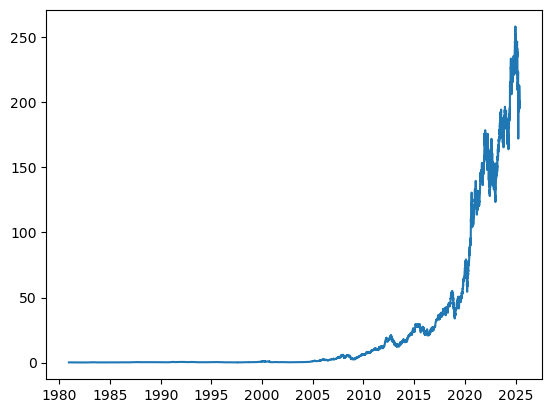

In [ ]:
plt.plot(data['Close']) # Plot the graph